In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [267]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/theater_audiences/movies_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/theater_audiences/movies_test.csv")
train.head()
train.count()

title             600
distributor       600
genre             600
release_time      600
time              600
screening_rat     600
director          600
dir_prev_bfnum    270
dir_prev_num      600
num_staff         600
num_actor         600
box_off_num       600
dtype: int64

In [221]:
train_null = train.isnull().sum()/len(train)*100
test_null = test.isnull().sum()/len(test)*100

pd.DataFrame({'train_null ' : train_null, 'test_null' : test_null})

,train_null,test_null
box_off_num,0.0,NaN
dir_prev_bfnum,55.0,55.967078
dir_prev_num,0.0,0.000000
director,0.0,0.000000
distributor,0.0,0.000000
genre,0.0,0.000000
num_actor,0.0,0.000000
num_staff,0.0,0.000000
release_time,0.0,0.000000
screening_rat,0.0,0.000000


In [268]:
# dir_prev_bfnum = 해당 감독의 이전영화 평균 관객수

alldata =  pd.concat([train, test], sort=False).reset_index(drop=True)

alldata.count()

title             843
distributor       843
genre             843
release_time      843
time              843
screening_rat     843
director          843
dir_prev_bfnum    377
dir_prev_num      843
num_staff         843
num_actor         843
box_off_num       600
dtype: int64

In [269]:
null_data = alldata[alldata['dir_prev_bfnum'].isnull()]

directors = null_data[['title', 'director']].groupby('director').count()
directors = directors.reset_index()
directors.head()

,director,title
0,New Pistol,1
1,강석필,1
2,강성옥,1
3,강우석,1
4,강의석,1


In [270]:
# 이전작이 없는 감독들 추출후 이전관객수를 0으로 초기화

direc_names = directors[directors['title'] == 1]['director'].unique()

for n in direc_names:
  alldata.loc[(alldata['director'] == n) & (alldata['dir_prev_bfnum'].isnull()), 'dir_prev_bfnum'] = 0 
  #directors.loc[directors['director'] == n, 'title']

print(len(directors[directors['title'] == 1]))
directors[directors['title'] == 1].head()

292


,director,title
0,New Pistol,1
1,강석필,1
2,강성옥,1
3,강우석,1
4,강의석,1


In [225]:
alldata.count()

title             843
distributor       843
genre             843
release_time      843
time              843
screening_rat     843
director          843
dir_prev_bfnum    669
dir_prev_num      843
num_staff         843
num_actor         843
box_off_num       600
dtype: int64

In [271]:
# 이전작이 있는 감독들 추출후 이전관객수 계산하여 기입



direc_names = directors[directors['title'] > 1]['director'].unique()

for n in direc_names:
  sum = alldata.loc[(alldata['director'] == n) & (alldata['dir_prev_bfnum'].notnull()), 'dir_prev_bfnum'].sum()
  num = alldata.loc[(alldata['director'] == n) & (alldata['dir_prev_bfnum'].notnull()), 'dir_prev_bfnum'].count()
  #print(n+" "+(str)(sum)+" "+(str)(num)+" "+(str)(sum/num))
  if sum > 0 and num > 0 :
    alldata.loc[(alldata['director'] == n) & (alldata['dir_prev_bfnum'].isnull()), 'dir_prev_bfnum'] = (int)(sum/num)
  else :
    alldata.loc[(alldata['director'] == n) & (alldata['dir_prev_bfnum'].isnull()), 'dir_prev_bfnum'] = 0
#direc_names


print(len(directors[directors['title'] > 1]))
directors[directors['title'] > 1].head()
alldata.describe()

70


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,843.000000,8.430000e+02,843.000000,843.000000,843.000000,6.000000e+02
mean,103.438909,4.761722e+05,0.869514,153.481613,3.640569,7.081818e+05
std,68.339202,1.235955e+06,1.187647,164.832451,2.356094,1.828006e+06
min,40.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,89.000000,3.000000,1.259100e+04
75%,114.000000,4.023662e+05,2.000000,273.500000,4.000000,4.798868e+05
max,2015.000000,1.761531e+07,6.000000,869.000000,25.000000,1.426277e+07


In [344]:
#각 감독별 역대 관객수 평균값

all_directors = alldata['director'].unique()

for n in all_directors:
  sum = alldata.loc[alldata['director'] == n, 'box_off_num'].sum();
  cnt = len(alldata[alldata['director'] == n]);
  #print((str)(sum)+" "+(str)(cnt))
  ave = (float)(sum/cnt)
  if sum == 0 or cnt == 0:
    ave = 0.0
  #if sum == 0:
  #  ave = alldata['box_off_num'].mean()


  alldata.loc[alldata['director'] == n, 'ave_prev_bfnum'] = ave

alldata.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre(status),distributor(status),director(status),release_year,release_month,release_day,release_date,screening_rat(status)
count,843.000000,8.430000e+02,843.000000,843.000000,843.000000,6.000000e+02,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,8.430000e+02,843.000000
mean,103.438909,4.761722e+05,0.869514,153.481613,3.640569,7.081818e+05,5.621590,49.154211,278.016607,2012.749703,6.951364,16.487544,2.012819e+07,2.137604
std,68.339202,1.235955e+06,1.187647,164.832451,2.356094,1.828006e+06,2.407009,50.364585,175.457237,1.728683,3.420111,8.710480,1.729844e+04,1.077759
min,40.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2.010010e+07,1.000000
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03,4.000000,16.000000,129.500000,2011.000000,4.000000,9.000000,2.011100e+07,1.000000
50%,100.000000,0.000000e+00,0.000000,89.000000,3.000000,1.259100e+04,6.000000,33.000000,264.000000,2013.000000,7.000000,17.000000,2.013070e+07,2.000000
75%,114.000000,4.023662e+05,2.000000,273.500000,4.000000,4.798868e+05,7.000000,67.500000,423.500000,2014.000000,10.000000,24.000000,2.014100e+07,3.000000
max,2015.000000,1.761531e+07,6.000000,869.000000,25.000000,1.426277e+07,12.000000,204.000000,614.000000,2015.000000,12.000000,31.000000,2.015120e+07,4.000000


In [189]:
#해당 영화 관객수 & 감독의 평균관객수에 log 취하기

alldata['box_off_num'] = np.log1p(alldata['box_off_num'])
alldata['ave_prev_bfnum'] = np.log1p(alldata['ave_prev_bfnum'])

In [338]:
status_list = ['genre', 'distributor', 'screening_rat', 'director']

for sl in status_list :
  t_col = alldata[sl].unique()

  alldata[sl+'(status)'] = 0
  count = 1

  for i in t_col:
    alldata.loc[alldata[sl] == i, sl+'(status)'] = count
    count += 1
  

alldata.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,ave_prev_bfnum,genre(status),distributor(status),director(status),release_year,release_month,release_day,release_date,screening_rat(status)
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398.0,23398,1,1,1,2012,11,22,20121100,1
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0,2.87014e+06,2,2,2,2015,11,19,20151100,1
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0,3.47954e+06,1,2,3,2013,6,5,20130600,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0,217866,3,3,4,2012,7,12,20120700,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0,483387,3,4,5,2010,11,4,20101100,2


In [339]:
alldata['release_year'] = pd.to_numeric(alldata['release_time'].str[:4])
alldata['release_month'] = pd.to_numeric(alldata['release_time'].str[5:7])
alldata['release_day'] = pd.to_numeric(alldata['release_time'].str[8:10])
#alldata['release_date'] = (alldata['release_year'] * 10000) + (alldata['release_month'] * 100)# + alldata['release_day']

alldata.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre(status),distributor(status),director(status),release_year,release_month,release_day,release_date,screening_rat(status)
count,843.000000,8.430000e+02,843.000000,843.000000,843.000000,6.000000e+02,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,8.430000e+02,843.000000
mean,103.438909,4.761722e+05,0.869514,153.481613,3.640569,7.081818e+05,5.621590,49.154211,278.016607,2012.749703,6.951364,16.487544,2.012819e+07,2.137604
std,68.339202,1.235955e+06,1.187647,164.832451,2.356094,1.828006e+06,2.407009,50.364585,175.457237,1.728683,3.420111,8.710480,1.729844e+04,1.077759
min,40.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2.010010e+07,1.000000
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03,4.000000,16.000000,129.500000,2011.000000,4.000000,9.000000,2.011100e+07,1.000000
50%,100.000000,0.000000e+00,0.000000,89.000000,3.000000,1.259100e+04,6.000000,33.000000,264.000000,2013.000000,7.000000,17.000000,2.013070e+07,2.000000
75%,114.000000,4.023662e+05,2.000000,273.500000,4.000000,4.798868e+05,7.000000,67.500000,423.500000,2014.000000,10.000000,24.000000,2.014100e+07,3.000000
max,2015.000000,1.761531e+07,6.000000,869.000000,25.000000,1.426277e+07,12.000000,204.000000,614.000000,2015.000000,12.000000,31.000000,2.015120e+07,4.000000


In [345]:
#데이터 값 반환

nTrain = len(train)
train = alldata[:nTrain]
test = alldata[nTrain:]

test.drop('box_off_num', axis=1, inplace=True)
train.describe()
test.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,ave_prev_bfnum,genre(status),distributor(status),director(status),release_year,release_month,release_day,release_date,screening_rat(status)
600,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,0,2,25,473,2010,1,7,20100100,1
601,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,0,7,2,474,2010,1,14,20100100,4
602,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,0,6,18,475,2010,1,28,20100100,4
603,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,1.47258e+06,1,2,125,2010,2,4,20100200,2
604,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,0,8,18,476,2010,2,18,20100200,2


In [306]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre(status),distributor(status),director(status),release_year,release_month,release_day,release_date,screening_rat(status)
time,1.000000,0.274061,0.306727,0.623205,0.114153,0.441452,-0.134480,-0.271695,-0.072049,-0.062575,-0.023969,-0.005590,-0.062976,-0.050751
dir_prev_bfnum,0.274061,1.000000,0.378047,0.387295,0.043157,0.301987,-0.036405,-0.146345,0.012297,0.019180,0.028727,-0.047699,0.019722,0.000464
dir_prev_num,0.306727,0.378047,1.000000,0.450706,0.014006,0.259674,-0.059938,-0.210767,-0.030166,0.132621,0.034019,0.031544,0.133142,-0.003488
num_staff,0.623205,0.387295,0.450706,1.000000,0.077871,0.544265,-0.145797,-0.335088,-0.003851,-0.032891,-0.002841,-0.009567,-0.032910,-0.011756
num_actor,0.114153,0.043157,0.014006,0.077871,1.000000,0.111179,0.008368,-0.070324,-0.097137,-0.098869,-0.015063,-0.017823,-0.099055,0.020971
box_off_num,0.441452,0.301987,0.259674,0.544265,0.111179,1.000000,-0.130971,-0.264887,-0.002764,-0.002497,0.019104,-0.026700,-0.002119,0.038600
genre(status),-0.134480,-0.036405,-0.059938,-0.145797,0.008368,-0.130971,1.000000,0.013640,0.002628,0.079224,0.021011,-0.043246,0.079549,-0.069588
distributor(status),-0.271695,-0.146345,-0.210767,-0.335088,-0.070324,-0.264887,0.013640,1.000000,0.259150,0.014396,0.017930,0.012405,0.014732,0.056140
director(status),-0.072049,0.012297,-0.030166,-0.003851,-0.097137,-0.002764,0.002628,0.259150,1.000000,0.042764,-0.034798,-0.001907,0.042034,0.029387
release_year,-0.062575,0.019180,0.132621,-0.032891,-0.098869,-0.002497,0.079224,0.014396,0.042764,1.000000,0.046627,0.018432,0.999808,-0.098931


In [304]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num', 'ave_prev_bfnum',
       'genre(status)', 'distributor(status)', 'director(status)',
       'release_year', 'release_month', 'release_day', 'release_date',
       'screening_rat(status)'],
      dtype='object')

In [348]:
f_col = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'release_year', 'release_month', 'release_day','genre(status)', 'distributor(status)', 'director(status)']
#f_col = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'ave_prev_bfnum', 'release_year', 'release_month', 'release_day','genre(status)', 'distributor(status)', 'director(status)']
#f_col = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'distributor(status)']

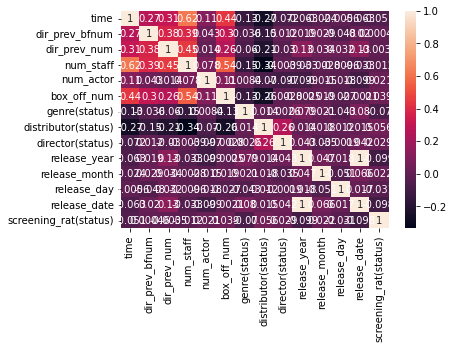

In [320]:
sns.heatmap(train.corr(), annot=True)

In [349]:


x_train = train[f_col]
y_train = train['box_off_num']

x_test = test[f_col]
x_test

,time,dir_prev_bfnum,dir_prev_num,num_staff,release_year,release_month,release_day,genre(status),distributor(status),director(status)
600,125,3.005290e+05,2,304,2010,1,7,2,25,473
601,113,3.427002e+05,4,275,2010,1,14,7,2,474
602,115,4.206611e+06,3,419,2010,1,28,6,18,475
603,116,6.913420e+05,2,408,2010,2,4,1,2,125
604,110,3.173800e+04,1,380,2010,2,18,8,18,476
...,...,...,...,...,...,...,...,...,...,...
838,78,2.590000e+03,1,4,2015,11,19,6,202,611
839,86,0.000000e+00,0,18,2015,10,29,4,23,612
840,107,0.000000e+00,0,224,2015,10,28,2,203,613
841,102,5.069900e+04,1,68,2015,10,22,6,204,614


In [293]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/theater_audiences/submission.csv")
submission.head()

,title,box_off_num
0,용서는 없다,1854711.0
1,아빠가 여자를 좋아해,6959083.0
2,하모니,3009406.0
3,의형제,51207.0
4,평행 이론,1346754.0


In [329]:
from sklearn.model_selection import KFold # K폴드는 k개의 폴드를 만들어서 교차 검증하는방법 (데이터양이 적을때 사용가능)
import lightgbm as lgb
k_fold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [352]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(random_state = 42)

gbr = GradientBoostingRegressor(random_state=42)

rf = RandomForestRegressor(random_state=42)

md_label = ['XGBRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor']

all_md = [xgb, gbr, rf]

all_rmse = []
for model, label in zip(all_md, md_label):
    model.fit(x_train, y_train)
    pred = model.predict(x_train)

  
    all_rmse.append({f'{label}' : mean_squared_error(y_train, pred, squared=False)})

print(all_rmse)

[09:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[{'XGBRegressor': 783347.4756589914}, {'GradientBoostingRegressor': 630785.7011351662}, {'RandomForestRegressor': 581484.8377395505}]


In [355]:
pred = xgb.predict(x_test)


In [356]:
submission['box_off_num'] = pred
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/theater_audiences/submission.csv", index=False)
submission.head(100)

,title,box_off_num
0,용서는 없다,1.454429e+06
1,아빠가 여자를 좋아해,1.354210e+06
2,하모니,1.598233e+06
3,의형제,2.019050e+06
4,평행 이론,1.085343e+06
...,...,...
95,천국의 아이들,4.440662e+05
96,할머니는 일학년,1.779765e+04
97,두레소리,3.255646e+05
98,"봄, 눈",9.135387e+05
